In [1]:
import pandas as pd
import seaborn as sns

In [2]:
"""
Hãy phân tích tác động của điểm toán với điểm DH1, DH2, DH3 dựa trên GT, KV, KT, DT, biết rằng mặc định DT là Kinh
"""

"""
b1: xử lý cơ bản
    1. xác định số lượng biến số tham gia
    2. thu thập dữ liệu
    3. Tổng quan dữ liệu
    4. xứ lý cơ bản
    - loại bỏ dòng trống
    - loại bỏ dòng trùng
    - khảo sát dữ liệu thiếu và điền thiếu
    5. Kiểm tra dữ liệu
"""

'\nb1: xử lý cơ bản\n    1. xác định số lượng biến số tham gia\n    2. thu thập dữ liệu\n    3. Tổng quan dữ liệu\n    4. xứ lý cơ bản\n    - loại bỏ dòng trống\n    - loại bỏ dòng trùng\n    - khảo sát dữ liệu thiếu và điền thiếu\n    5. Kiểm tra dữ liệu\n'

In [3]:
df = pd.read_csv('dulieuxettuyendaihoc.csv', header = 0, delimiter=',', encoding='unicode_escape')

df.dropna(how='all', inplace=True)
df.drop_duplicates(inplace=True)
df['DT'].fillna('Kinh', inplace=True)
df = df[['T1', 'T2', 'T3', 'T4', 'T5', 'T6','DH1', 'DH2', 'DH3', 'GT', 'KV', 'KT', 'DT']]
df

,T1,T2,T3,T4,T5,T6,DH1,DH2,DH3,GT,KV,KT,DT
0,7.2,8.4,7.4,7.2,7.4,6.9,3.25,3.25,4.50,F,2NT,A1,Kinh
1,5.4,6.3,4.3,4.9,3.0,4.0,6.00,4.00,3.50,M,1,C,Kinh
2,5.6,5.0,2.8,6.1,4.8,5.7,5.00,6.75,4.00,M,1,C,Kinh
3,6.6,5.1,5.9,4.1,6.1,7.4,4.25,4.25,5.25,M,1,D1,Kinh
4,6.0,5.4,7.6,4.4,6.8,8.0,4.25,4.50,5.00,M,2NT,A,Kinh
...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,8.6,8.9,7.7,6.7,7.9,6.6,5.25,1.50,6.25,F,1,C,Kinh
96,3.7,4.1,3.1,3.4,5.5,5.7,5.25,3.75,4.75,F,1,C,Kinh
97,8.8,9.5,9.5,8.5,9.0,8.5,7.00,8.00,4.00,M,2NT,C,Kinh
98,2.7,2.8,6.2,5.2,4.1,4.3,5.00,3.50,5.50,M,1,C,Kinh


<AxesSubplot:xlabel='DT', ylabel='count'>

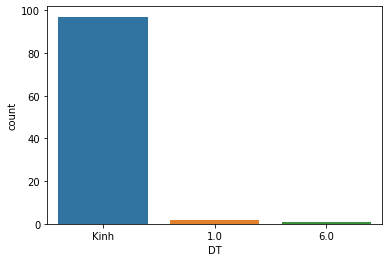

In [4]:
"""Hãy trực quan số lượng sinh viên theo giới tính"""

from numpy import count_nonzero
sns.countplot(x='DT', data=df)

<AxesSubplot:xlabel='GT', ylabel='count'>

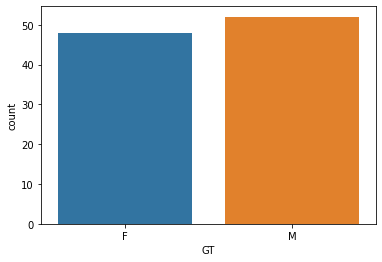

In [5]:

sns.countplot(x='GT', data=df)

<AxesSubplot:xlabel='KV', ylabel='count'>

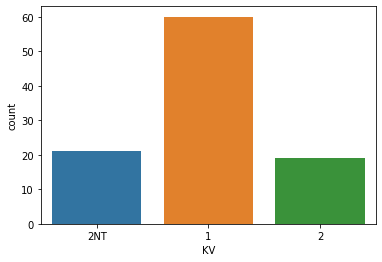

In [6]:

sns.countplot(x='KV', data=df)

In [7]:
"""
Hãy so sánh số lượng học sinh dự thi theo nhóm giới tính
"""

'\nHãy so sánh số lượng học sinh dự thi theo nhóm giới tính\n'

<AxesSubplot:xlabel='KT', ylabel='count'>

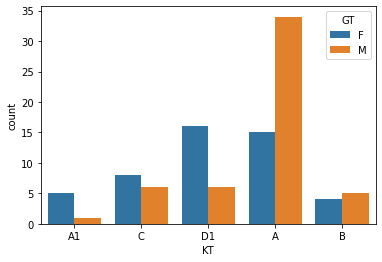

In [8]:
sns.countplot(x='KT', hue='GT', data=df)

<AxesSubplot:xlabel='KT', ylabel='count'>

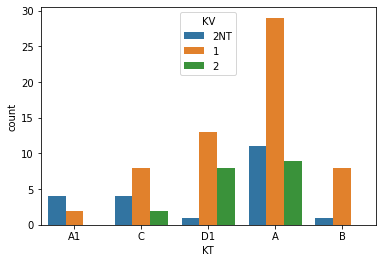

In [9]:
sns.countplot(x='KT', hue='KV', data=df)

<AxesSubplot:xlabel='KV', ylabel='count'>

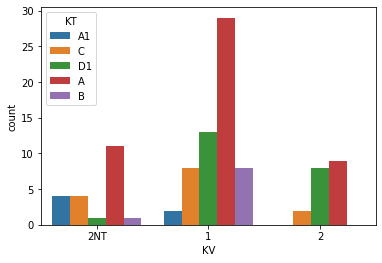

In [10]:
sns.countplot(x='KV', hue='KT', data=df)

<AxesSubplot:xlabel='GT', ylabel='T1'>

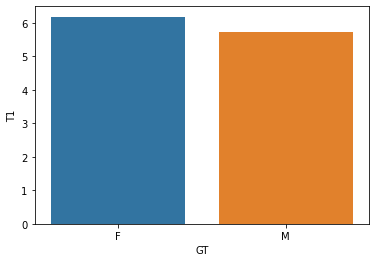

In [11]:
"""
Hãy so sánh điểm toán học kì 1 năm lớp 10 của nhóm giới tính
"""
sns.barplot(x="GT", y='T1', data=df, ci=None)

<AxesSubplot:xlabel='KT', ylabel='DH1'>

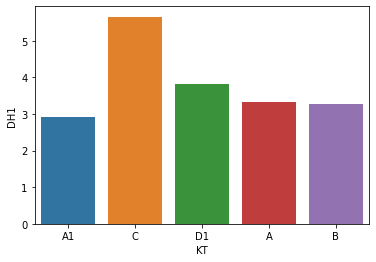

In [12]:
"""
Hãy so sánh điểm trung binfh DH1 trene nnhóm khối thi
"""
sns.barplot(x="KT", y='DH1', data=df, ci=None)

<AxesSubplot:xlabel='GT', ylabel='DH1'>

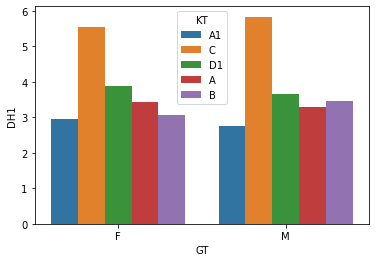

In [13]:
'''So sánh điểm trung bình DH1 theo nhóm giới tính dựa trên khối thi'''
sns.barplot(x='GT', y='DH1', hue='KT', data=df, ci=None)
# plt.show()

In [14]:
'''
-----Ngày 04/6/2022------
'''

'\n-----Ngày 04/6/2022------\n'

In [15]:
# Ngày 04/06/2022
# Kỹ thuật feature engineering
# -> đây là kỹ thuật tạo thêm hoặc biến đổi số liệu sẵn có thành các biến số mới phù hợp nghiệp vụ phân tích

# Ví dụ lệ phí đăng ký thi
# A1: 60000
# C: 40000
# D1: 35000
# A: 55000
# B: 80000
# Hãy tạo ra cột LEPHI thoả mãn yêu cầu trên

dict_map = {
    'A1': 60000, 'C': 40000, 'D1': 35000, 'A': 55000, 'B': 80000
}
df['LEPHI'] = df['KT'].map(dict_map)
df

,T1,T2,T3,T4,T5,T6,DH1,DH2,DH3,GT,KV,KT,DT,LEPHI
0,7.2,8.4,7.4,7.2,7.4,6.9,3.25,3.25,4.50,F,2NT,A1,Kinh,60000
1,5.4,6.3,4.3,4.9,3.0,4.0,6.00,4.00,3.50,M,1,C,Kinh,40000
2,5.6,5.0,2.8,6.1,4.8,5.7,5.00,6.75,4.00,M,1,C,Kinh,40000
3,6.6,5.1,5.9,4.1,6.1,7.4,4.25,4.25,5.25,M,1,D1,Kinh,35000
4,6.0,5.4,7.6,4.4,6.8,8.0,4.25,4.50,5.00,M,2NT,A,Kinh,55000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,8.6,8.9,7.7,6.7,7.9,6.6,5.25,1.50,6.25,F,1,C,Kinh,40000
96,3.7,4.1,3.1,3.4,5.5,5.7,5.25,3.75,4.75,F,1,C,Kinh,40000
97,8.8,9.5,9.5,8.5,9.0,8.5,7.00,8.00,4.00,M,2NT,C,Kinh,40000
98,2.7,2.8,6.2,5.2,4.1,4.3,5.00,3.50,5.50,M,1,C,Kinh,40000


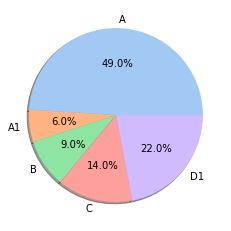

In [16]:
# Biểu đồ Pie
import matplotlib.pyplot as plt
# Mục đích: Trực quan hoá dữ liệu theo nhóm tỉ lệ phần trăm

gb = df.groupby(['KT'])['KT'].agg(['count'])
labels = gb.index
data = list(gb['count'])

colors = sns.color_palette('pastel') #tạo bảng màu
plt.pie(data, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True)
plt.show()

#Pie theo khu vực


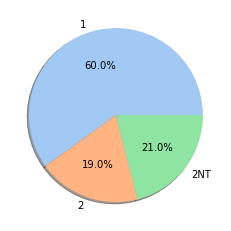

In [17]:
gb = df.groupby(['KV'])['KV'].agg(['count'])
labels = gb.index
data = list(gb['count'])

colors = sns.color_palette('pastel') #tạo bảng màu
plt.pie(data, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True)
plt.show()

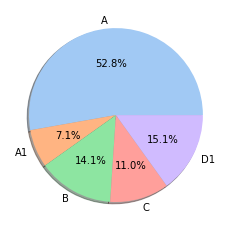

In [18]:
#biến định tính thì chỉ có hàm count để sử dụng tổng hợp
#biến định lượng thì có nhiều hàm để sử dụng như sum, min, max, avg,...

# Trực quan tỉ lệ phần trăm chi phí dự thi trên từng khối thi
gb = df.groupby(['KT'])['LEPHI'].agg(['sum'])
labels = gb.index
# print(labels)
data = list(gb['sum'])

colors = sns.color_palette('pastel') #tạo bảng màu
plt.pie(data, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True)
plt.show()


In [19]:
# Khi trực quan dữ liệu ta cần lưu ý đến loại biến đang tham gia vào trực quan. Thông thường việc lựa chọn biểu đồ sẽ căn cứ dựa trên ý nghĩa nghiệp vụ và sự phối hợp giữa csac loiaj biến như:
# - ĐỊnh tính kết hợp định đính tính
# - Định tính kết hợp định lượng
# - Định lượng kết hợp định lượng

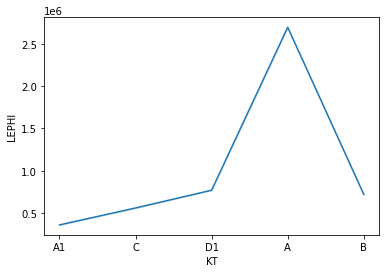

In [20]:
# Biểu đồ line 
# Mục đích: Thường dùng cho trực quan dữ liệu theo thời gian

# Trực quan dữ liệu chi phí dự thi dựa theo khối thi bằng biểu đồ line

sns.lineplot(x='KT', y='LEPHI', data=df, estimator=sum)
plt.show()


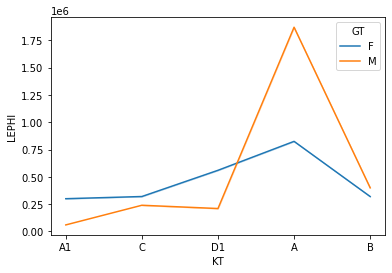

In [21]:
# Trực quan chi phí dự thi theo khối thi theo từng nhóm giới tính bằng biểu đồ line
sns.lineplot(x='KT', y='LEPHI', hue='GT', data=df, estimator=sum)
plt.show()


In [22]:

# Phân tích định lượng
# Phân tích định lượng lấy trọng tâm là các biến định lượng

# bước 1. Mô tả dữ liệu biến định lượng T1

df['T1'].describe()

count    100.000000
mean       5.946000
std        1.608338
min        2.400000
25%        5.000000
50%        5.850000
75%        7.200000
max        9.300000
Name: T1, dtype: float64

In [23]:
# std càng cao thì dữ liệu biến động càng cao
# std thấp thì mean mới có nghĩa thống kê
# thống kê trên 100 sinh viên
# điểm trung bình là 5.9
# độ biến động dữ liệu là 1.6
# điểm thấp nhất là 2.4
# có 25% sinh viên có điểm nhỏ hơn 5
# 50% sinh viên có điểm nhỏ hơn 5.8
# ...

In [24]:
df[['T1','T2','T3','T4','T5','T6','DH1','DH2','DH3']].describe()

,T1,T2,T3,T4,T5,T6,DH1,DH2,DH3
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.0000,100.000000,100.000000,100.000000
mean,5.946000,6.374000,6.383000,6.291000,6.717000,6.9370,3.740000,4.255000,4.875000
std,1.608338,1.561443,1.574484,1.469563,1.478059,1.3632,1.424408,1.060053,1.041136
min,2.400000,2.800000,2.300000,2.900000,3.000000,3.7000,1.000000,1.500000,2.750000
25%,5.000000,5.300000,5.175000,5.300000,5.800000,6.0000,2.500000,3.500000,4.250000
50%,5.850000,6.250000,6.650000,6.350000,6.800000,7.1000,3.625000,4.125000,4.750000
75%,7.200000,7.525000,7.500000,7.600000,7.800000,8.0000,4.750000,4.750000,5.500000
max,9.300000,9.600000,9.500000,9.400000,9.500000,9.5000,7.000000,8.000000,8.000000


In [25]:
df.groupby('GT')['T1'].describe()

,count,mean,std,min,25%,50%,75%,max
GT,,,,,,,,
F,48.0,6.187500,1.612006,2.4,5.175,6.2,7.300,8.8
M,52.0,5.723077,1.587774,2.5,4.850,5.6,6.525,9.3


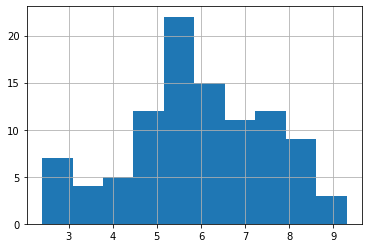

In [26]:
# Histogram cho biết xác xuất xảy ra của biến cố

df['T1'].hist()
plt.show()

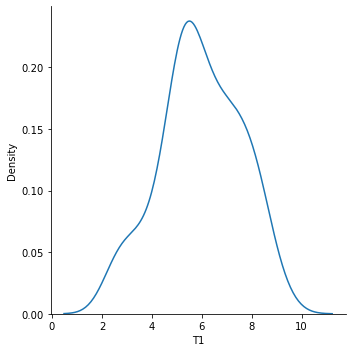

In [27]:
sns.displot(df, x='T1', kind='kde')
plt.show()

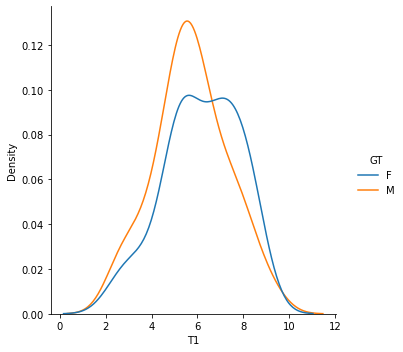

In [28]:
sns.displot(df, x='T1',hue='GT', kind='kde')
plt.show()

In [29]:
'''
------ Ngày 07/06/2022-------
'''

'\n------ Ngày 07/06/2022-------\n'

<AxesSubplot:>

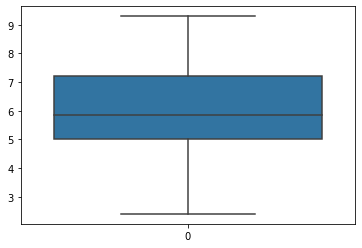

In [30]:
'''
Đây là biểu đồ quan trọng trong việc phân tích dữ liệu định lượng
Biểu đồ này cung cấp các thông tin quan trọng như:
    1. Q1: Tứ phân vị 25%
    2. Q2: Tứ phân vị 50% (median)
    3. Q3: Tứ phân vị 75%
    4. Khoảng IQR = Q3-Q1  (50% dữ liệu bình thường ko hư hỏng sẽ nằm ở đây)
    5. Lower bound = Q1-1.5*IQR (những dữ liệu bé hơn cận này thì sẽ là ngoại biên)
    6. Upper bound = Q3+1.5*IQR (những dữ liệu lớn hơn cận này thì sẽ là ngoại biên)
    7. Các ngoại biên (outlier) cần xử lý trong dữ liệu

    Ngoại biên là những giá trị rất khác biệt so với đa số các giá trị khác. Ngoại biên sẽ ảnh hưởng rất nhiều khi tính giá trị trung bình.
    Tuy nhiên các phương pháp phân tích dữ liệu đều xoay quanh giá trị trung bình được xem như là giá trị kỳ vọng. 
    Do đó khi dữ liệu có ngoại biên chúng ta cần tìm phương pháp xử lý.
    Có 1 số cách để xử lý
        1. Có  thể loại bỏ nếu giá trị ngoại biên không tác động mạnh đến vấn đề nghiên cứu
        2. Tìm phương pháp thay thế giá trị ngoại biên bằng 1 giá trị nào đó, bởi vì ngoại biên không phải là giá trị sai
        3. Hoặc đề ra một phương pháp nghiên cứu khác tách bạch giữa ngoại biên và dữ liệu phân tích
'''
sns.boxplot(data=df['T1'])


<AxesSubplot:>

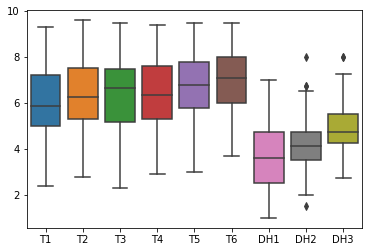

In [31]:
sns.boxplot(data=df[['T1','T2','T3','T4','T5','T6','DH1','DH2','DH3']])
# Trên dữ liệu DH2 và DH3 xuất hiện ngoại biên

<AxesSubplot:xlabel='GT', ylabel='T1'>

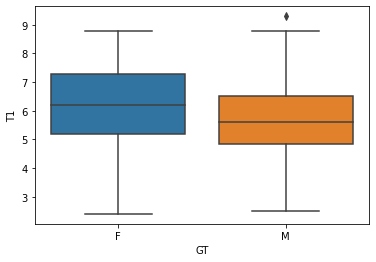

In [32]:
sns.boxplot(x='GT',y='T1',data=df)

<AxesSubplot:xlabel='KT', ylabel='DH1'>

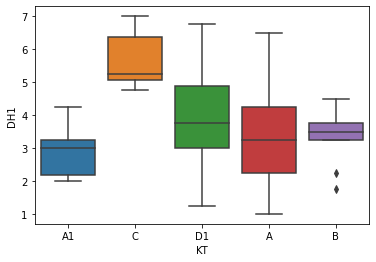

In [33]:
sns.boxplot(x='KT',y='DH1',data=df)

<AxesSubplot:xlabel='KT', ylabel='DH1'>

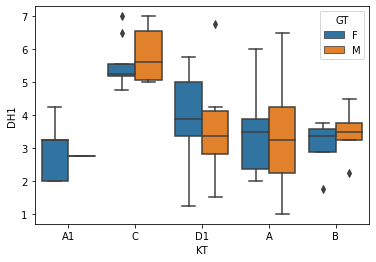

In [34]:
# Phân tích điểm dh1 trên từng khối thi dựa theo giới tính
sns.boxplot(x='KT',y='DH1',hue='GT',data=df)

<AxesSubplot:xlabel='KV', ylabel='DH2'>

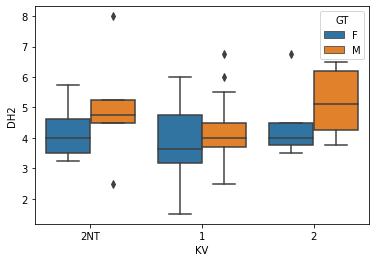

In [35]:
# Phân tích điểm dh2, dh3 theo khu vực dựa trên giới tính

sns.boxplot(x='KV',y='DH2',hue='GT',data=df)


<AxesSubplot:xlabel='KV', ylabel='DH3'>

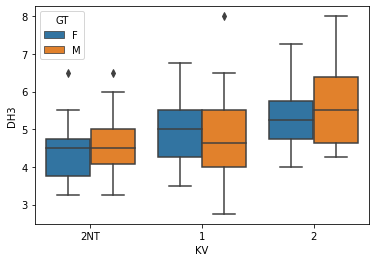

In [36]:
sns.boxplot(x='KV',y='DH3',hue='GT',data=df)

In [37]:
'''
Skewness = độ xiên
Độ lớn của skewness cho biết mức độ dữ liệu lệch nhiều hay ít so với đường cong phân phối chuẩn

'''

df['T1'].skew()
df[['T1','T2','T3','T4','T5','T6']].skew()
# KHI PHÂN TÍCH DỮ LIỆU VỚI CÁC PHƯƠNG PHÁP CÓ LIÊN QUAN PHÂN PHỐI CHUẨN
# NẾU DỮ LIỆU QUÁ LỆCH SO VỚI PHÂN PHỐI CHUẨN THÌ TA CẦN ĐIỀU CHỈNH BẰNG CÁC HÀM TRANSFROMM CHO BỚT LỆCH (THƯỜNG THÌ KHI TRỊ TUYỆT ĐỐI VƯỢT QUÁ 1)
# ĐẶC BIỆT LÀ PHÂN TÍCH HỒI QUY


# Đối với các dữ liệu ko phân phối chuẩn đẹp cần phải đưa ra các Assumption để đưa về 

T1   -0.178243
T2    0.039634
T3   -0.473535
T4   -0.263226
T5   -0.478066
T6   -0.484640
dtype: float64

<function matplotlib.pyplot.show(close=None, block=None)>

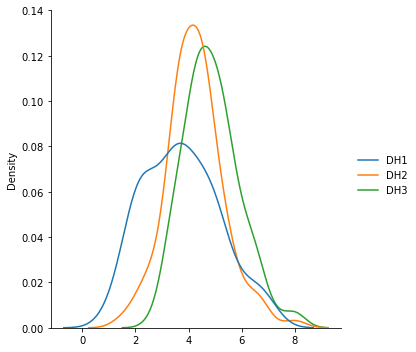

In [38]:
sns.displot(df[['DH1','DH2','DH3']], kind='kde')
plt.show

In [39]:
'''
Kurtosis : Độ nhọn
Trị tuyệt đối cho biết độ nhọn của phân phối 
'''
df[['T1','T2','T3','T4','T5','T6','DH1','DH2','DH3']].kurtosis()

T1    -0.480104
T2    -0.677771
T3    -0.208899
T4    -0.542134
T5    -0.189668
T6    -0.228734
DH1   -0.517004
DH2    1.372439
DH3    0.442173
dtype: float64

'\nNHÌN BIỂU ĐỒ NÀY CHO BIẾT Ý NGHĨA CỦA KUTORSIS\nGIÁ TRỊ CÀNG CAO THÌ THỂ HIỆN DỮ LIỆU TẬP TRUNG VÀO 1 KHOẢNG CAO\nGIÁ TRỊ CÀNG THẤP THÌ THỂ HIỆN DỮ LIỆU PHÂN BỐ RÃI ĐỀU\nBIỂU ĐÔ PHÂN PHỐI CHO BIẾT SÁC XUẤT RƠI CỦA GIÁ TRỊ NẰM Ở KHOẢNG NÀO \n'

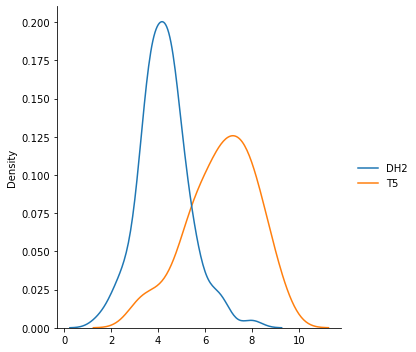

In [40]:
sns.displot(df[['DH2','T5']], kind='kde')
plt.show

'''
NHÌN BIỂU ĐỒ NÀY CHO BIẾT Ý NGHĨA CỦA KUTORSIS
GIÁ TRỊ CÀNG CAO THÌ THỂ HIỆN DỮ LIỆU TẬP TRUNG VÀO 1 KHOẢNG CAO
GIÁ TRỊ CÀNG THẤP THÌ THỂ HIỆN DỮ LIỆU PHÂN BỐ RÃI ĐỀU
BIỂU ĐÔ PHÂN PHỐI CHO BIẾT SÁC XUẤT RƠI CỦA GIÁ TRỊ NẰM Ở KHOẢNG NÀO 
'''

'\nĐƯỜNG MÀU ĐỎ LÀ ĐƯỜNG KIỂM ĐỊNH\nCÁC GIÁ TRỊ PHÂN BỔ CÀNG GẦN ĐƯỜNG MÀU ĐỎ THÌ CÀNG GẦN PHÂN PHỐI CHUẨN\n'

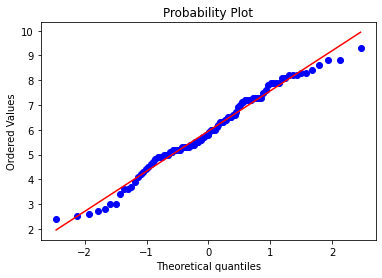

In [41]:
'''
KIỂM ĐỊNH PHÂN PHỐI CHUẨN
CÓ RẤT NHIỀU CÁCH ĐỂ KIỂM TRA BIẾN ĐỊNH LƯỢNG CÓ TUÂN THEO PHÂN PHỐI CHUẨN HAY KHÔNG
CÁC PHƯƠNG PHÁP KIỂM ĐỊNH NÀY THƯỜNG ĐƯỢC SỬ DỤNG CHO PHƯƠNG PHÁP HỒI QUY CHO DỮ LIỆU DOANH NGHIỆP
'''

from scipy import stats

stats.probplot(df['T1'],plot=sns.mpl.pyplot)
plt.show


'''
ĐƯỜNG MÀU ĐỎ LÀ ĐƯỜNG KIỂM ĐỊNH
CÁC GIÁ TRỊ PHÂN BỔ CÀNG GẦN ĐƯỜNG MÀU ĐỎ THÌ CÀNG GẦN PHÂN PHỐI CHUẨN
'''

<function matplotlib.pyplot.show(close=None, block=None)>

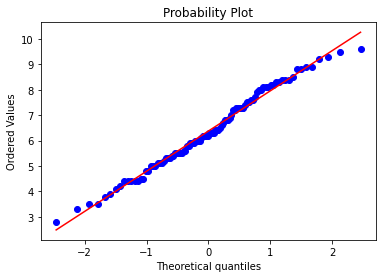

In [42]:
from scipy import stats

stats.probplot(df['T2'],plot=sns.mpl.pyplot)
plt.show


<function matplotlib.pyplot.show(close=None, block=None)>

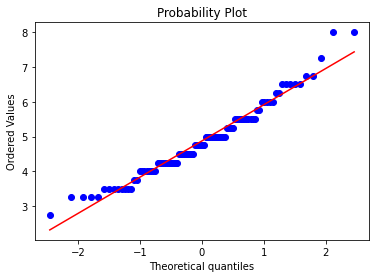

In [43]:
from scipy import stats

stats.probplot(df['DH3'],plot=sns.mpl.pyplot)
plt.show

In [44]:
'''
Pearson Correlation : HỆ SỐ TƯƠNG QUAN TUYẾN TÍNH, ĐƯỢC SỬ DỤNG ĐỂ SO SÁNH MỨC ĐỘ PHỤ THUỘC TUYẾN TÍNH CỦA 2 "biến định lượng"
Giá trị giao động từ [-1,1]
Giá trị này rất lớn gần bằng 1 nên có tính tương quan đồng biến rất mạnh
'''

df[['T1','T2']].corr()



,T1,T2
T1,1.00000,0.74575
T2,0.74575,1.00000


In [45]:
'''
Khi trị tuyệt đối của giá trị correlation >= 0.5 thì khi đó chúng ta mới tính đến chuyện phân tích tương quan hồi quy
'''
df[['T1','T2','T3','T4','T5','T6','DH1','DH2','DH3']].corr()

,T1,T2,T3,T4,T5,T6,DH1,DH2,DH3
T1,1.000000,0.745750,0.585319,0.520067,0.592798,0.519035,0.049254,0.150497,0.093952
T2,0.745750,1.000000,0.641550,0.649281,0.570521,0.566116,0.120347,0.143031,0.182985
T3,0.585319,0.641550,1.000000,0.716712,0.657270,0.585507,0.088651,0.063597,0.130094
T4,0.520067,0.649281,0.716712,1.000000,0.663908,0.595900,-0.039854,0.121606,0.133606
T5,0.592798,0.570521,0.657270,0.663908,1.000000,0.778683,0.019512,0.184647,0.026830
T6,0.519035,0.566116,0.585507,0.595900,0.778683,1.000000,-0.033360,0.301490,0.045638
DH1,0.049254,0.120347,0.088651,-0.039854,0.019512,-0.033360,1.000000,0.035154,0.018731
DH2,0.150497,0.143031,0.063597,0.121606,0.184647,0.301490,0.035154,1.000000,-0.091523
DH3,0.093952,0.182985,0.130094,0.133606,0.026830,0.045638,0.018731,-0.091523,1.000000


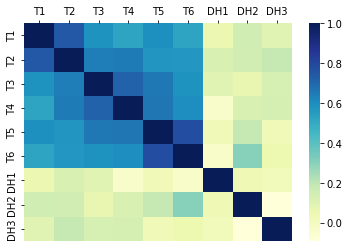

In [47]:
sns.heatmap(df[['T1','T2','T3','T4','T5','T6','DH1','DH2','DH3']].corr(),cmap="YlGnBu",vmax=1.0,square=False).xaxis.tick_top()
# Thể hiện corr theo biểu đồ heatmap